In [1]:
from sympy import *
from numpy import zeros
from IPython.display import Latex, display


def inverse_metric_calc(xmetric):
    """
    Taking the inverse of a metric
    
    Input: xmetric - the given metric, g_ij
    Output: The inverse of the metric, g^ij
    """
    inverse_metric = MutableSparseNDimArray(zeros((4,)*2))
    for i in range(0, 4):
        inverse_metric[i, i] = 1 / xmetric[i, i]
    return inverse_metric

def derivative_of_metric(xmetric, i, j, k):
    """
    Taking the derivative of a given metric; \partial_i(g_jk)
    where g_jk is the metric and the \partial_i is the partial derivative with respect to i'th component 
    
    Input:  xmetric - given metric
            i,j,k - Indices that runs from 0-4
    Output: The partial derivative of a given metric's [j][k] component with respect to the [i]'th  component
    """
    expr = xmetric[j][k]
    return diff(expr, syms[i])

def derivative_of_chris(xchris_symb, i, j, k, l):
    """
    Taking the derivative of a given christoffel symbol; \partial_i (\Gamma^j_kl)
    where \Gamma^j_kl is the christoffel symbol and the \partial_i is the partial derivative with respect to i'th component 
    
    Input:  xchris_symb - given Christoffel Symbol
            i,j,k,l - Indices that runs from 0-4
    Output: The partial derivative of a given Christoffel Symbols's ^[j]_[k][l] component with respect to the [i]'th component
    """
    expr = xchris_symb[j, k, l]
    return diff(expr, syms[i])


def christoffel_sym_calctr(xmetric):
    """
    Input:  The Metric Tensor 
    Output: Christoffel Symbols, \Gamma^m_ij
    """
    # creating an empty tensor to fill
    Chris_sym = MutableSparseNDimArray(zeros((4,)*3)) 
    for m in range(0, 4):
        for i in range(0, 4):
            for j in range(0, 4):
                einstein_sum = 0
                for k in range (0, 4):
                    I1 = derivative_of_metric(xmetric, j, k, i)
                    I2 = derivative_of_metric(xmetric, i, k, j)
                    I3 = derivative_of_metric(xmetric, k, i, j)
                    S = I1 + I2 - I3
                    einstein_sum += 1/2 * g_inverse[m, k] * S     
                Chris_sym[m, i, j] = einstein_sum
    return Chris_sym


def riemann_tensor_calctr(xchris_symbol):
    """
    Input:  Christoffel Symbols 
    Output: The Riemann Curvature Tensor, R^(l)_(ijk)
    """
    # creating an empty tensor to fill
    riemann_curv_tensor = MutableSparseNDimArray(zeros((4,)*4))
    for i in range(0, 4):
        for j in range(0, 4):
            for k in range(0, 4):
                for l in range(0, 4):
                    Q1 = derivative_of_chris(xchris_symbol, j, l, i, k)
                    Q2 = derivative_of_chris(xchris_symbol, i, l, j, k)
                    einstein_sum = 0
                    for p in range(0, 4):
                        I1 = xchris_symbol[p, i, k] * xchris_symbol[l, j, p]
                        I2 = xchris_symbol[p, j, k] * xchris_symbol[l, i, p]
                        einstein_sum += (I1 - I2)
                    riemann_curv_tensor[l, i, j, k] = Q1 - Q2 + einstein_sum
    return riemann_curv_tensor

def ricci_tensor_calctr(xriemann_tensor):
    """
    Input:  The Riemann Curvature Tensor, R^(l)_(ijk)
    Output: The Ricci Tensor, R_(ik)
    """
    # creating an empty tensor to fill
    ricci_tensor = MutableSparseNDimArray(zeros((4,)*2))
    einstiem_sum = 0
    for i in range(0, 4):
        for k in range(0, 4):
            einstein_sum = 0
            for j in range(0, 4):
                einstein_sum += xriemann_tensor[j, i, j, k]
            ricci_tensor[i, k] = einstein_sum
    return ricci_tensor

def ricci_scalar_calctr(xmetric, xricci_tensor):
    """
    Input: The Ricci Tensor, R_(ik)
    Output: The Ricci Scalar, R
    """
    R = 0 # The Ricci Scalar
    for i in range(0, 4):
        for k in range(0, 4):
            R += g_inverse[i, k] * xricci_tensor[i, k]
    return R

In [2]:
init_printing() 

# defining the symbols 
syms = symbols("t r theta phi")

# defining the metric components
metric = MutableSparseNDimArray(zeros((4,)*2))
metric[0, 0] = -1
metric[1, 1] = 1
metric[2, 2] = syms[1]**2
metric[3, 3] = (syms[1]**2)*(sin(syms[2])**2)

# the metric
g = metric

#Inverse of the metric
g_inverse = inverse_metric_calc(metric)

In [3]:
Christoffel_symbol = christoffel_sym_calctr(g)
Riemann_curv_tensor = riemann_tensor_calctr(Christoffel_symbol)
Ricci_curv = ricci_tensor_calctr(Riemann_curv_tensor)
R = ricci_scalar_calctr(g, Ricci_curv)

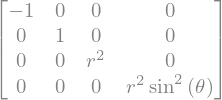

In [4]:
#The Metric Tensor

g.tolist()
g

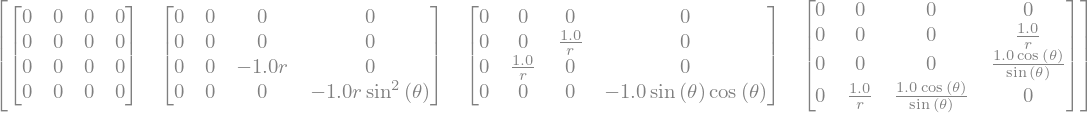

In [5]:
#Christoffel Symbols

Christoffel_symbol.tolist()
Christoffel_symbol

In [6]:
#Non-zero Components of the Christoffel Symbols

for i in range(0, 4):
    for j in range(0, 4):
        for k in range(0, 4):
            if Christoffel_symbol[i, j, k] != 0:
                display(Latex('$\\Gamma^{{{0}}}{{}}_{{{1}~{2}}} = {3}$'.format(latex(syms[i]), latex(syms[j]), latex(syms[k]), latex(Christoffel_symbol[i,j,k]))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

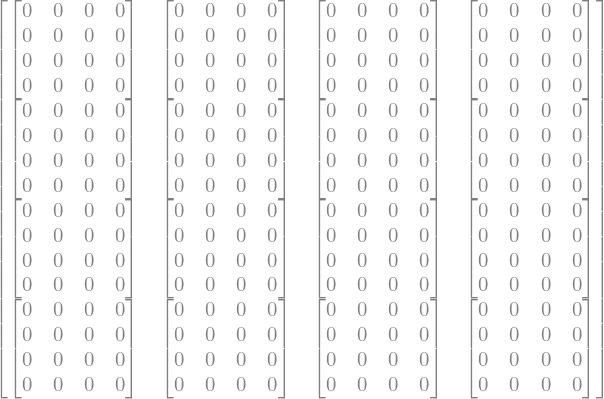

In [7]:
#The Riemann Curvature Tensor

Riemann_curv_tensor.tolist()
Riemann_curv_tensor

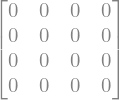

In [8]:
#The Ricci Curvature Tensor

Ricci_curv.tolist()
Ricci_curv

In [9]:
#The Ricci Scalar

R